# Exploratory Data Analaysis
In this notebook, we conduct an initial exploratory data analysis, delving into the distributions of the dataset's variables, scrutinizing outliers, and assessing internal correlations.

The dataset comprises various attributes describing bank customers:

1. **Age**: Numerical data representing the age of the customer.
2. **Job**: Categorical data indicating the type of job the customer has.
3. **Marital Status**: Categorical data specifying the marital status of the customer.
4. **Education**: Categorical data denoting the educational background of the customer.
5. **Default**: Binary data indicating whether the customer has credit in default.
6. **Balance**: Numerical data representing the average yearly balance in euros.
7. **Housing**: Binary data indicating whether the customer has a housing loan.
8. **Loan**: Binary data indicating whether the customer has a personal loan.
9. **y** (Target): Binary data denoting whether the client has subscribed to a term deposit.

In [1]:
from time import time
import pickle as pkl

In [2]:
import warnings
warnings.filterwarnings("ignore",
                        category=UserWarning)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
timer_start = time()

In [5]:
color1 = "cornflowerblue"
color2 = "khaki"
color3 = "peachpuff"

We begin by importing the preprocessed DataFrame containing the dataset (see **data_preprocessing.jpynb**) and we visualize it to get familiar with the data.

In [6]:
df = pd.read_pickle(filepath_or_buffer="dataframe.pkl")

In [7]:
df.head()

,balance,age,education,management,unemployed,technician,student,services,self-employed,retired,entrepreneur,housemaid,blue-collar,loan,housing,default,single,married,y
id,,,,,,,,,,,,,,,,,,,
0,2143,58,3,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1,29,44,2,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
2,2,33,2,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False
5,231,35,3,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
6,447,28,3,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False


## Distribution Analysis
We utilize histogram charts to analyze the distributions of numerical variables.

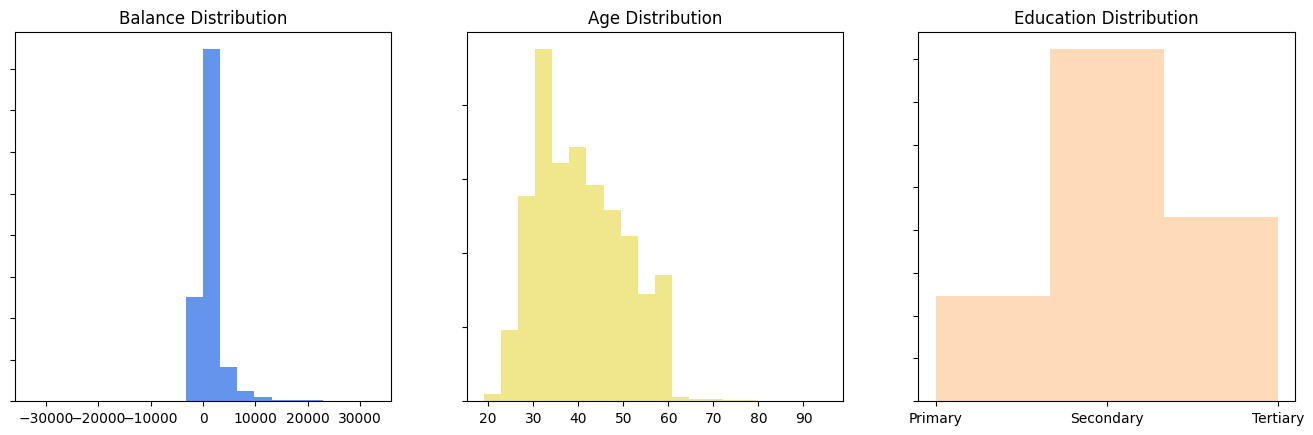

In [8]:
_, (balance, age, education) = plt.subplots(nrows=1, 
                                            ncols=3,
                                            gridspec_kw={"left": 0, 
                                                         "right": 2})

balance.hist(df.balance, 
             bins=20, 
             density=True, 
             color=color1)
balance.set_title("Balance Distribution")
balance.set_yticklabels([])

age.hist(df.age, 
         bins=20,
         density=True,
         color=color2)
age.set_title("Age Distribution")
age.set_yticklabels([])

education.hist(df.education,
               bins=3, 
               density=True,
               color=color3)
education.set_title("Education Distribution")
education.set_xticks([1, 2, 3])
education.set_xticklabels(["Primary", 
                           "Secondary", 
                           "Tertiary"])
education.set_yticklabels([])

plt.show()

Acknowledging the distinct presence of **outliers** within the *balance* and *age* columns, it's worth noting that for the forthcoming model, which will be built upon an ensemble of Random Forests, outliers are not considered a critical concern.

Moving forward, we employ bar charts to scrutinize the distributions of the categorical variables.

In [9]:
df_job = df.drop(labels=["balance", 
                         "age", 
                         "education", 
                         "loan", 
                         "housing", 
                         "default", 
                         "single", 
                         "married", 
                         "y"], axis=1)
df_job = df_job.sum().sort_values()
df_marital_status = df[["single", "married"]].copy().sum()
df_marital_status["divorced"] = df.y.count() - df_marital_status.sum()
df_marital_status.sort_values(inplace=True)

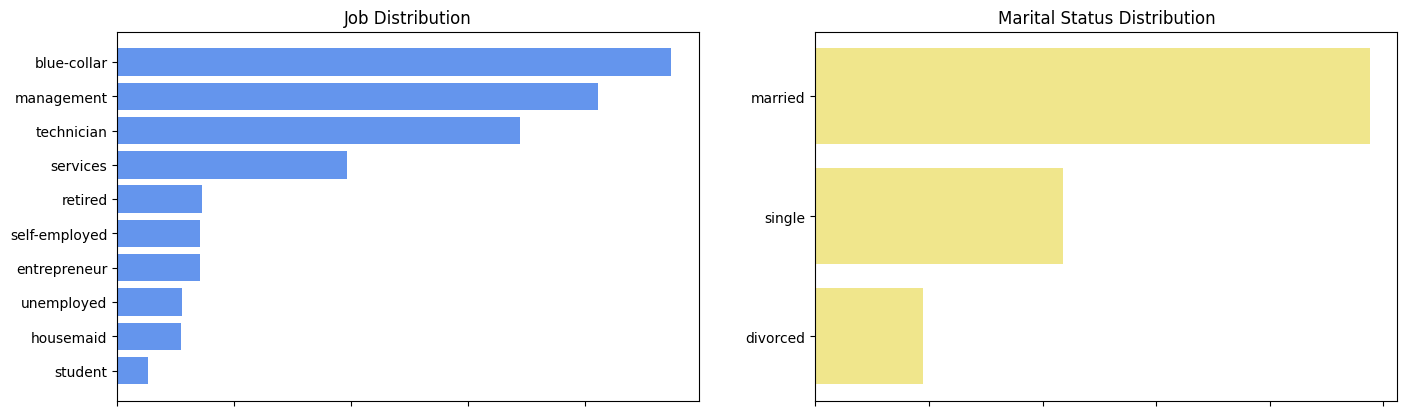

In [10]:
_, charts = plt.subplots(nrows=1, 
                         ncols=2,
                         gridspec_kw={"left": 0, 
                                      "right": 2,})
job, marital_status = charts.flatten()

job.barh(y=df_job.index.tolist(), 
         width=df_job.values.tolist(),
         color=color1)
job.set_title("Job Distribution")
job.set_xticklabels([])

marital_status.barh(y=df_marital_status.index.tolist(), 
                    width=df_marital_status.values.tolist(),
                    color=color2)
marital_status.set_title("Marital Status Distribution")
marital_status.set_xticklabels([])

plt.show()

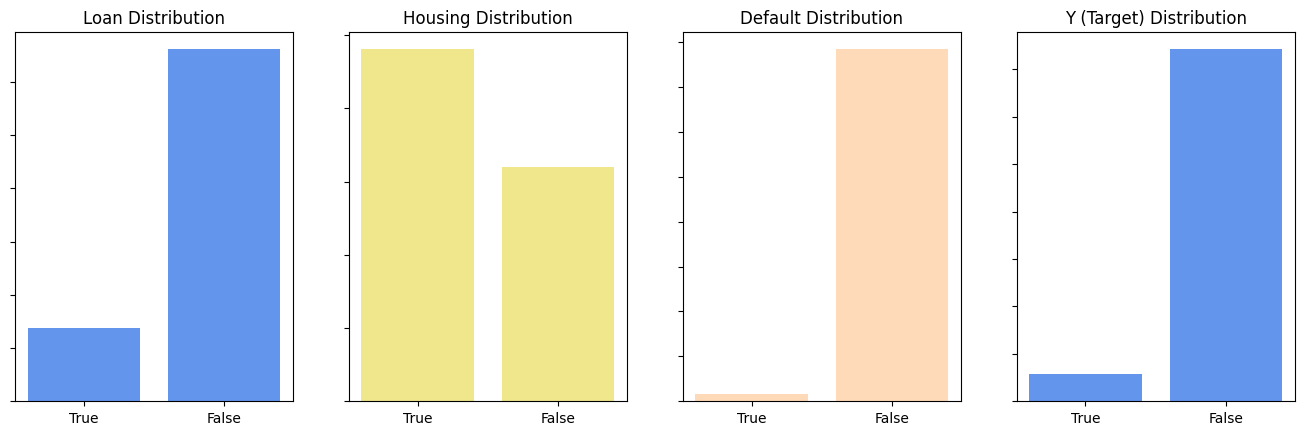

In [11]:
_, charts = plt.subplots(nrows=1, 
                         ncols=4,
                         gridspec_kw={"left": 0, 
                                      "right": 2})
loan, housing, default, y = charts.flatten()

loan.bar(x=["True", "False"], 
         height=[df.loan.sum(), 
                 df.loan.count() - df.loan.sum()],
         color=color1)
loan.set_title("Loan Distribution")
loan.set_yticklabels([])

housing.bar(x=["True", "False"], 
            height=[df.housing.sum(), 
                    df.housing.count() - df.housing.sum()],
            color=color2)
housing.set_title("Housing Distribution")
housing.set_yticklabels([])

default.bar(x=["True", "False"], 
            height=[df.default.sum(), 
                    df.default.count() - df.default.sum()],
            color=color3)
default.set_title("Default Distribution")
default.set_yticklabels([])

y.bar(x=["True", "False"], 
      height=[df.y.sum(), 
              df.y.count() - df.y.sum()],
      color=color1)
y.set_title("Y (Target) Distribution")
y.set_yticklabels([])

plt.show()

It's important to observe the **significant imbalance** present in the distribution of the target variable *y*%%!. This suggests that one outcome class may be significantly more prevalent than the other. When training a model, it's crucial to address this class imbalance to prevent the model from being biased toward the majority class and potentially yielding suboptimal performance.
## Correlation
We proceed to examine the internal correlations among the variables. By exploring these correlations, we aim to uncover any relationships or dependencies between different attributes within the dataset.

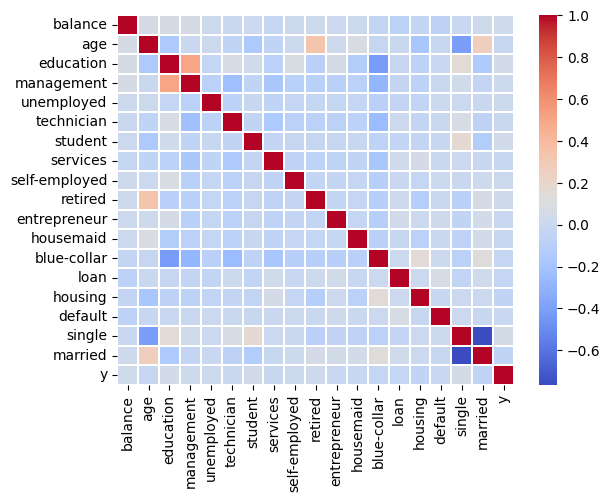

In [12]:
sns.heatmap(data=df.corr(),
            cmap="coolwarm",
            linewidths=.01)
plt.show()

Eventually, we visualize correlation between the most relevant variables (*age* and *balance*) and the target *y* (see **model_evaluation.ipynb**).

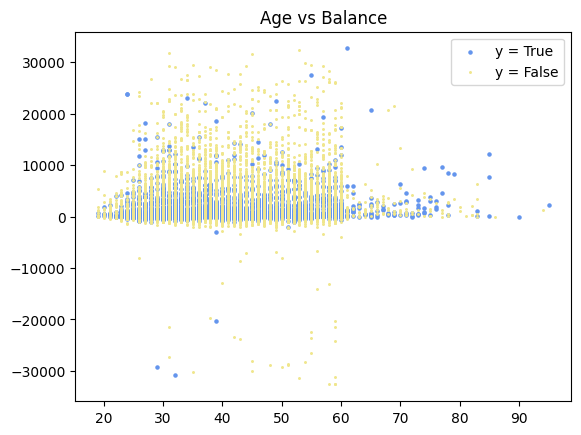

In [13]:
df_copy = df.copy()
df_copy = df_copy[df_copy.y]
plt.scatter(x=df_copy.age,
            y=df_copy.balance,
            marker=".", 
            s=20,
            c=color1, 
            label="y = True")

df_copy = df.copy()
df_copy = df_copy[df_copy.y == False]
plt.scatter(x=df_copy.age,
            y=df_copy.balance,
            marker=".", 
            s=5,
            c=color2,
            label="y = False")

plt.title("Age vs Balance")
plt.legend()
plt.show()

In [14]:
print(f"Total running time of the script: {time() - timer_start: .2f}s")

Total running time of the script:  1.22s
